### Лабораторная работа: построение различных графиков c помощью matplotlib

#### Формулировка заданий, сигнатуры функций и примеры выводов:
#### https://github.com/spreadingmind/python_data_analysis_2021/blob/master/hw2/hw2.ipynb

In [2]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.ticker as ticker
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

### Упражнение 1

* Реализуйте функцию `plot_horizontal_bar`, рисующую горизонтальные bar'ы

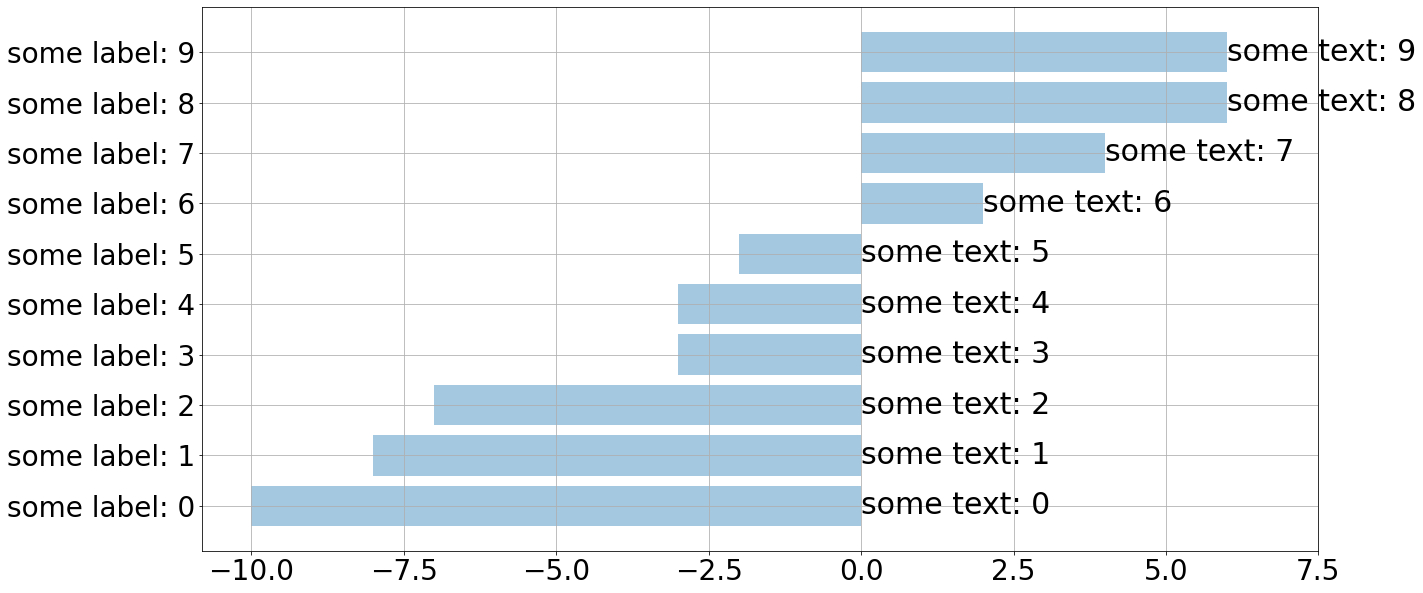

In [283]:
bars_length = np.random.randint(-10, 10, 10)
bars_length.sort()
yticks_labels = ['some label: {}'.format(i) for i in range(10)]
labels = ['some text: {}'.format(i) for i in range(10)]
figsize = (20, 10)

axis_fontsize = 28
label_fontsize = 30
bar_color = '#A5C8E1'


def plot_horizontal_bar(bars_length, labels, yticks_labels, figsize):
    ind = np.arange(len(bars_length))
    plt.figure(figsize=figsize)
    plt.barh(ind, bars_length, color=bar_color)
    plt.yticks(np.arange(0, 10, 1), labels=yticks_labels, fontsize=axis_fontsize)
    plt.xticks(np.arange(-10, 10, 2.5), fontsize=axis_fontsize)
    plt.grid(True)

    annotate_bars(bars_length, labels)

    plt.show()


def annotate_bars(bars_length, labels):
    for index, value in enumerate(bars_length):
        if value > 0:
            plt.annotate(labels[index], xy=(value, index),
                         fontsize=label_fontsize, ha='left', va='center')
        else:
            plt.annotate(labels[index], xy=(value, index),
                         fontsize=label_fontsize, xytext=(0, index), va='center')


plot_horizontal_bar(bars_length, labels, yticks_labels, figsize)

### Упражнение 2

* Реализуйте функцию `plot_time_probabilities`, рисующую изменяющиеся во времени вероятности неких событий.
* Cобытия для нас имеют тональность (от плохого к хорошему). Отразите ее на графике с помощью градиента по цвету.

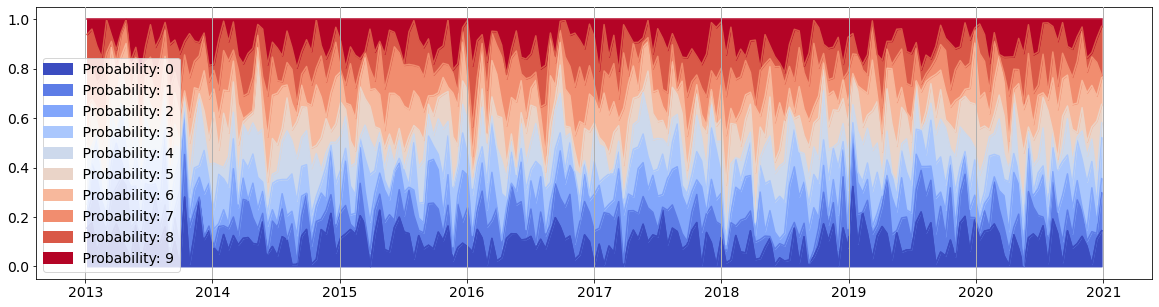

In [284]:
ncols = 10
figsize = (20, 5)
fontsize = 14

dti = pd.date_range('2013-01-01', '2020-12-31', freq='2W')
probabilities_in_time = np.random.random((ncols, len(dti)))
probabilities_in_time = probabilities_in_time / \
    probabilities_in_time.sum(axis=0)
probabilities_in_time = pd.DataFrame(probabilities_in_time).T
probabilities_in_time.index = dti

cm_subsection = np.linspace(0, 1, ncols)
colors = [cm.coolwarm(x) for x in cm_subsection]


def plot_time_probabilities(probabilities_in_time, figsize):
    plt.figure(figsize=figsize)
    plt.yticks(np.arange(0, 1.2, 0.2), fontsize=fontsize)
    plt.xticks(fontsize=fontsize)

    draw_stack_plot(colors, probabilities_in_time)
    set_grid()
    set_legend()

    plt.show()


def draw_stack_plot(colors, probabilities_in_time):
    for i, color in enumerate(colors):
        if i == 0:
            plt.plot(probabilities_in_time[i], color=color)
            plt.fill_between(probabilities_in_time.index,
                             probabilities_in_time[0], color=color)

        else:
            probabilities_in_time[i] += probabilities_in_time[i-1]
            plt.fill_between(probabilities_in_time.index,
                             probabilities_in_time[i], probabilities_in_time[i-1],
                             color=color)

        plt.plot(probabilities_in_time[i], label=' Probability: {}'.format(
            i), color=color)

def set_grid():
    ax = plt.gca()
    ax.set_axisbelow(False)
    ax.xaxis.grid(True, linestyle='-', lw=1)


def set_legend():
    leg = plt.legend(loc='lower left', fontsize=14, handlelength=1.3)
    for i in leg.legendHandles:
        i.set_linewidth(12)


plot_time_probabilities(probabilities_in_time, figsize)

### Упражнение 3
 
* Реализуйте функцию `plot_intraday_ts`, рисующую тепловую карту по временному ряду с внутридневными данными

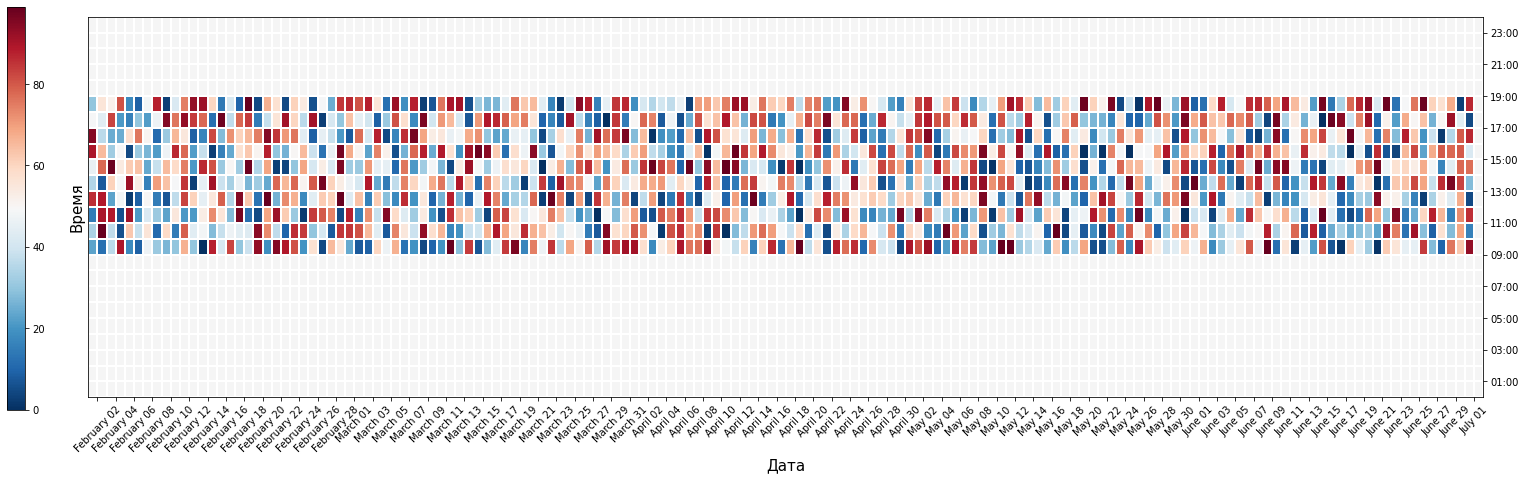

In [285]:
intraday_ts = pd.Series(np.random.randint(0, 100, 3625),
                        index=pd.date_range('2020-02-01', '2020-07-01', freq='H'))
intraday_ts.loc[(intraday_ts.index.hour < 9) | (
    intraday_ts.index.hour > 18)] = np.nan
figsize = (25, 7)
dates_int = pd.date_range('2020-02-01', '2020-07-01', freq='D')
n_days = len(dates_int)


def build_heatmap(fig, ax, data, cmap):
    heatmap = ax.pcolor(daily.T, cmap=cmap)
    cbaxes = fig.add_axes([0.08, 0.1, 0.01, 0.8])
    cb = plt.colorbar(heatmap, ax=[ax], cax=cbaxes)


def set_x_ticks(ax):
    x_ticks_labels = [d.strftime('%B %d') for d in pd.date_range(
        '2020-02-02', '2020-07-02', freq='2D')]
    positions_x = np.arange(1, n_days, 2)
    ax.xaxis.set_major_locator(ticker.FixedLocator(positions_x))
    ax.xaxis.set_major_formatter(ticker.FixedFormatter(x_ticks_labels))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    ax.tick_params(axis='x', which='minor', width=0)
    ax.tick_params(axis='x', which='major', rotation=45)
    ax.set_xlabel('Дата', fontsize=15)


def set_y_ticks(ax):
    y_ticks_labels = [d.strftime('%H:%M')
                      for d in pd.date_range(date, periods=24, freq="2H")]
    positions_y = np.arange(1, 24, 2)
    ax.yaxis.set_major_locator(ticker.FixedLocator(positions_y))
    ax.yaxis.set_major_formatter(ticker.FixedFormatter(y_ticks_labels))
    ax.yaxis.set_minor_locator(MultipleLocator(1))
    ax.tick_params(axis='y', which='minor', width=0)
    ax.yaxis.tick_right()
    ax.set_ylabel('Время', fontsize=15)


def set_grid(ax):
    ax.set_facecolor('#F5F5F5')
    ax.grid(which='major', linestyle='-', lw=2, color='white')
    ax.grid(which='minor', linestyle='-', lw=2, color='white')


def plot_intraday_ts(intraday_ts, figsize):
    # add missing ts data for the last day
    date = dt.datetime(2020, 7, 1) + dt.timedelta(hours=1)
    idx = pd.date_range(date, periods=23, freq="H")
    missing_hours = pd.Series(np.array([np.nan for i in range(23)]), index=idx)
    intraday_ts = intraday_ts.append(missing_hours)

    # group values by days
    daily = np.array(intraday_ts.values.tolist()).reshape(n_days, 24)

    # build plot
    fig, ax = plt.subplots(figsize=figsize)
    build_heatmap(fig, ax, daily, 'RdBu_r')

    set_x_ticks(ax)
    set_y_ticks(ax)
    set_grid(ax)

    plt.show()


plot_intraday_ts(intraday_ts, figsize)